<a href="https://colab.research.google.com/github/muhsinzubair/Data-Science-Projects/blob/main/WalmartCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart CaseStudy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart.csv

--2023-04-29 16:10:15--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.210, 18.172.139.94, 18.172.139.46, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  51.6MB/s    in 0.4s    

2023-04-29 16:10:16 (51.6 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



# Initial Analysis and Plotting

**Data description:**

Transactional data of customers who purchased products from the Walmart Stores during Black Friday

**Business Problem:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

In [ ]:
df = pd.read_csv('walmart.csv')

**Preview of the data:**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


**Shape of the data(rows and columns):**

In [ ]:
df.shape

(550068, 10)

**Basic information on columns:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Description of columns:**

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

**Basic statistics on continuous columns:**

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**Total no. of customers:**

In [ ]:
df.User_ID.nunique()

5891

**Histogram of Purchase columns(continuous):**

<Axes: xlabel='Purchase', ylabel='Count'>

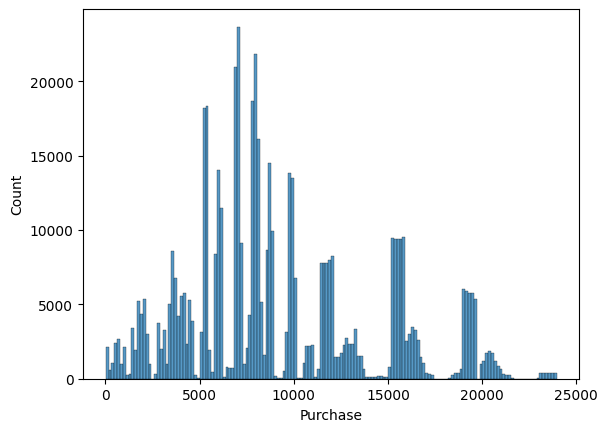

In [ ]:
sns.histplot(df,x='Purchase')

**Observation:** most of the purchases lie between price of 5k and 10k

**KDE plot of purchase column(continuous):**

<Axes: xlabel='Purchase', ylabel='Density'>

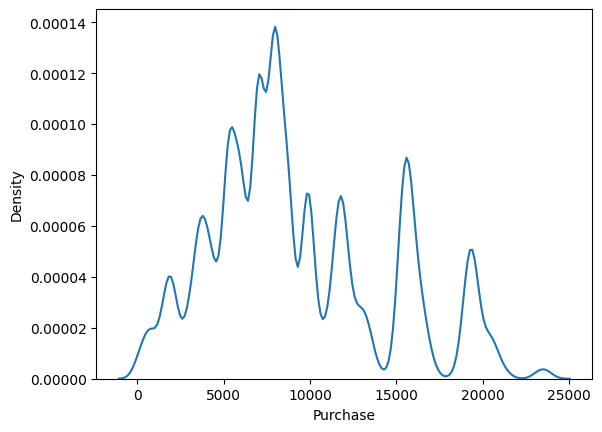

In [ ]:
sns.kdeplot(data=df,x='Purchase')

**Total count of Male of Female customers:**

count of female customers:

In [ ]:
df.query('Gender == "F"').User_ID.nunique()

1666

count of male customers:

In [ ]:
df.query('Gender == "M"').User_ID.nunique()

4225

**Countplot on gender column(categorical):**

<Axes: xlabel='Gender', ylabel='count'>

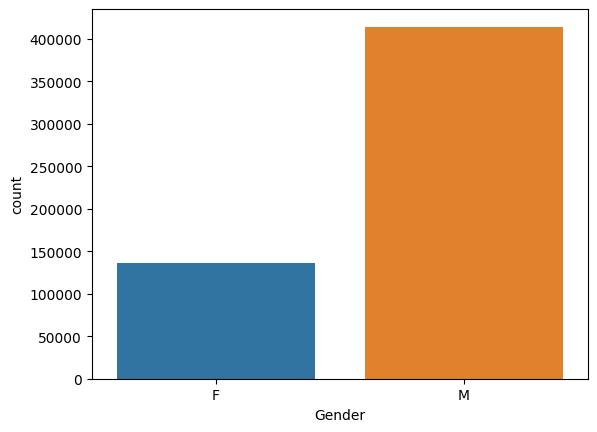

In [ ]:
sns.countplot(data=df,x='Gender')

**Observation:** male customers are the large proportion of customers

**Count of married and unmarried customers:**

count of married customers:

In [ ]:
df.query('Marital_Status == 1').User_ID.nunique()

2474

count of unmarried customers:

In [ ]:
df.query('Marital_Status == 0').User_ID.nunique()

3417

**Countplot on marital status column(categorical):**

<Axes: xlabel='Marital_Status', ylabel='count'>

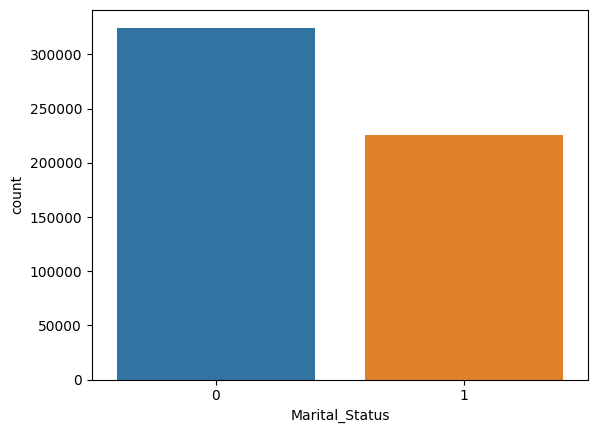

In [ ]:
sns.countplot(data=df,x='Marital_Status')

**Value counts based on age:**

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

**Countplot on age column(categorical):**

<Axes: xlabel='Age', ylabel='count'>

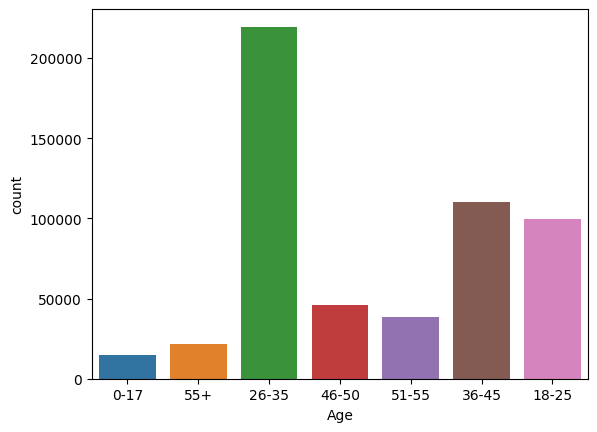

In [ ]:
sns.countplot(data=df,x='Age')

**Observation:** Main customers are from age group of 26 t0 45

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

**Countplot on stay in city column(categorical):**

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

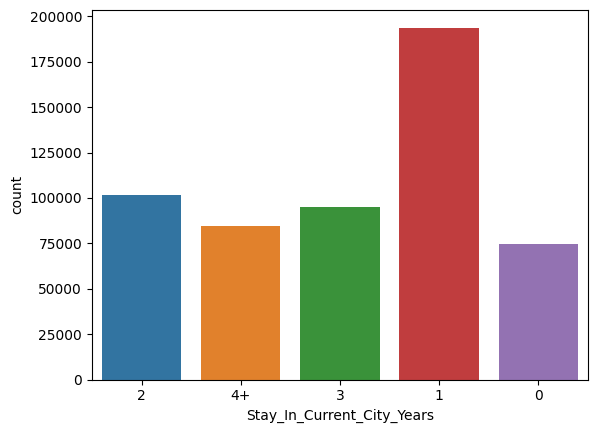

In [ ]:
sns.countplot(data=df,x='Stay_In_Current_City_Years')

**Observation:**  Most of the customers are new residents in the city

In [ ]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

**Boxplot on gender/purchase and indentifying outliers:**

<Axes: xlabel='Gender', ylabel='Purchase'>

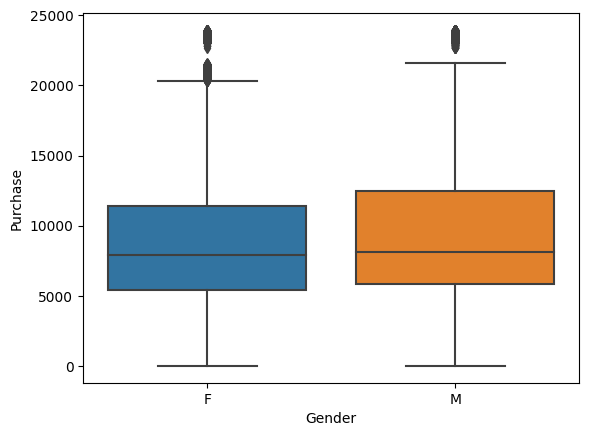

In [ ]:
sns.boxplot(data=df,x='Gender',y='Purchase')

Barplot on gender/purchase

<Axes: xlabel='Gender', ylabel='Purchase'>

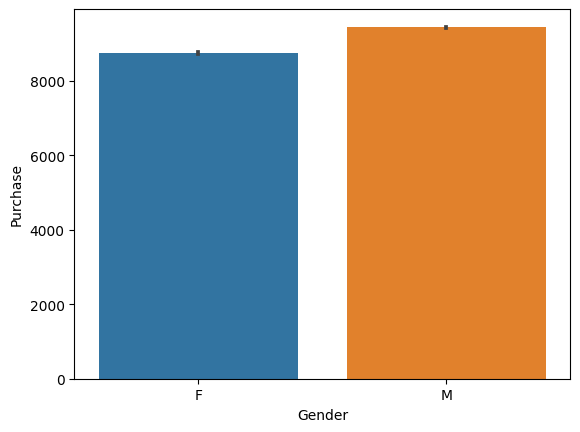

In [ ]:
sns.barplot(data=df,x='Gender',y='Purchase')

**Boxplot on maritalstatus/purchase:**

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

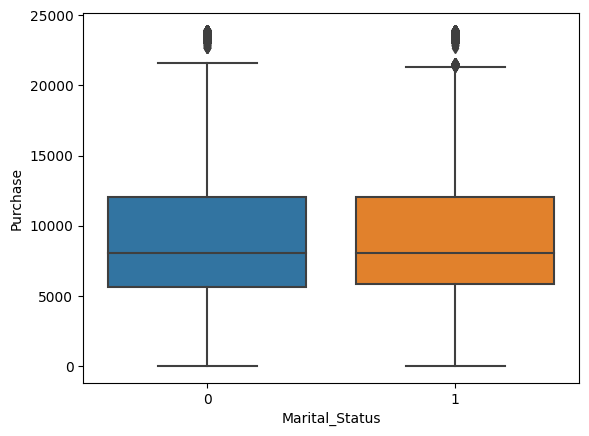

In [ ]:
sns.boxplot(data=df,x='Marital_Status',y='Purchase')

**Boxplot on age/purchase:**

<Axes: xlabel='Age', ylabel='Purchase'>

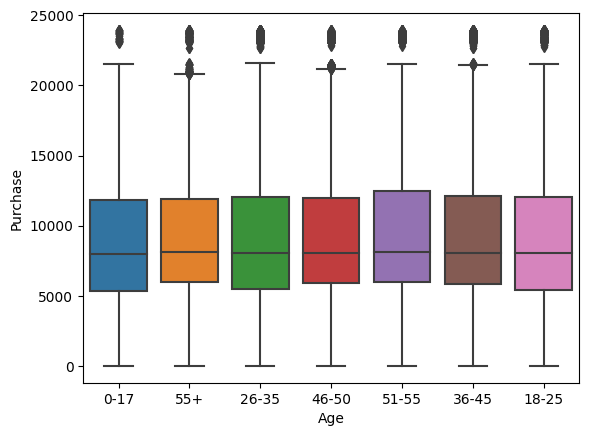

In [ ]:
sns.boxplot(data=df, x='Age',y='Purchase')

# Confidence Intervals

**Question: Confidence intervals and distribution of the mean of the expenses by female and male customers:**

**Confidence interval for female customer spending:**

In [ ]:
f_purc_lis = df.query('Gender == "F"').Purchase
sample_mean_lis_f = []
for i in range(1000):
  sample = np.random.choice(f_purc_lis,size=len(f_purc_lis))
  samplemean = sample.mean()
  sample_mean_lis_f.append(samplemean)


In [ ]:
f_purc_lis.mean()

8734.565765155476

<Axes: ylabel='Count'>

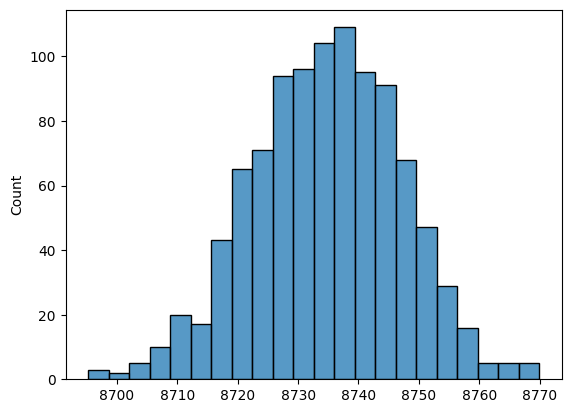

In [ ]:
sns.histplot(sample_mean_lis_f)

**90%**

In [ ]:
np.percentile(sample_mean_lis_f,[5.0,95.0])

array([8714.12133217, 8753.71023386])

**95%**

In [ ]:
np.percentile(sample_mean_lis_f,[2.5,97.5])

array([8710.59965301, 8757.0151945 ])

**99%**

In [ ]:
np.percentile(sample_mean_lis_f,[.5,99.5])

array([8702.82686858, 8765.8224403 ])

**Confidence interval for male customer spending:**

In [ ]:
m_purc_lis = df.query('Gender == "M"').Purchase
sample_mean_lis_m = []
for i in range(1000):
  sample = np.random.choice(m_purc_lis,size=len(m_purc_lis))
  samplemean = sample.mean()
  sample_mean_lis_m.append(samplemean)

In [ ]:
m_purc_lis.mean()

9437.526040472265

<Axes: ylabel='Count'>

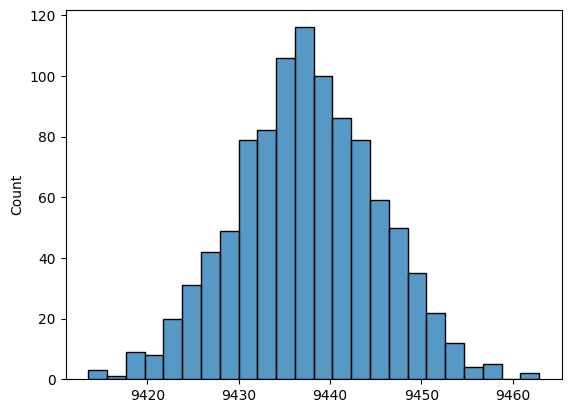

In [ ]:
sns.histplot(sample_mean_lis_m)

**90%**

In [ ]:
np.percentile(sample_mean_lis_m,[5.0,95.0])

array([9424.34879472, 9450.13079837])

**95%**

In [ ]:
np.percentile(sample_mean_lis_m,[2.5,97.5])

array([9422.29600172, 9452.45757395])

**99%**

In [ ]:
np.percentile(sample_mean_lis_m,[.5,99.5])

array([9417.84694104, 9457.33024833])

**Question: Are women spending more money per transaction than men? Why or Why not?**

**Answer: Men are spending more money than women, the reason may be the low participation of women customers compare to men.**

**Question: Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

**Answer: Confidence intervals of male female customers are not overlapping, clearly improvement is needed in participation of female customers**

**Variance of sample means based on sample size:**

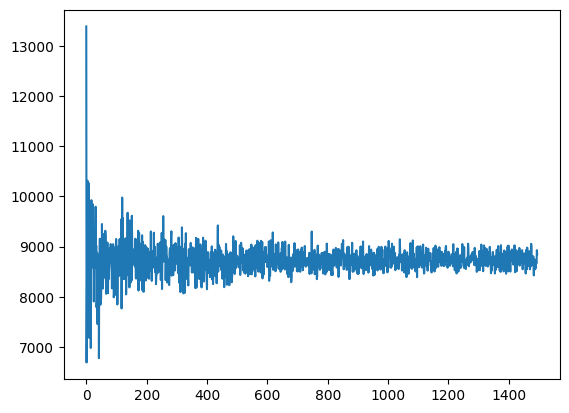

In [ ]:
sample_mean_lis_clt = []
for i in range(5,1500):
  sample = np.random.choice(f_purc_lis,size=i)
  samplemean = sample.mean()
  sample_mean_lis_clt.append(samplemean)
plt.plot(sample_mean_lis_clt)

**Confidence interval for unmarried customer spending:**

In [ ]:
unmarried_purchase = df.query('Marital_Status == 0').Purchase

In [ ]:
unmarried_purchase.mean()

9265.907618921507

In [ ]:
unmarried_sample_means = []
for i in range(1000):
  sample = np.random.choice(unmarried_purchase,size=len(unmarried_purchase))
  samplemean = sample.mean()
  unmarried_sample_means.append(samplemean)

<Axes: ylabel='Count'>

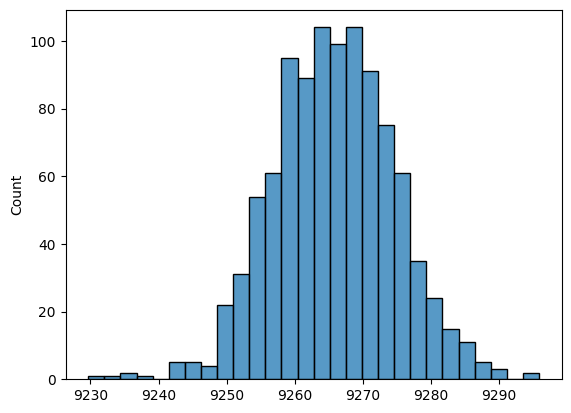

In [ ]:
sns.histplot(unmarried_sample_means)

**90%**

In [ ]:
np.percentile(unmarried_sample_means,[5.0,95.0])

array([9251.5697562 , 9280.23656134])

**95%**

In [ ]:
np.percentile(unmarried_sample_means,[2.5,97.5])

array([9249.47785421, 9283.25009   ])

**99%**

In [ ]:
np.percentile(unmarried_sample_means,[.5,99.5])

array([9242.25756348, 9288.2853803 ])

**Confidence interval for married customers:**

In [ ]:
married_purchase = df.query('Marital_Status == 1').Purchase

In [ ]:
married_purchase.mean()

9261.174574082374

In [ ]:
married_sample_means = []
for i in range(1000):
  sample = np.random.choice(married_purchase,size=len(married_purchase))
  samplemean = sample.mean()
  married_sample_means.append(samplemean)

<Axes: ylabel='Count'>

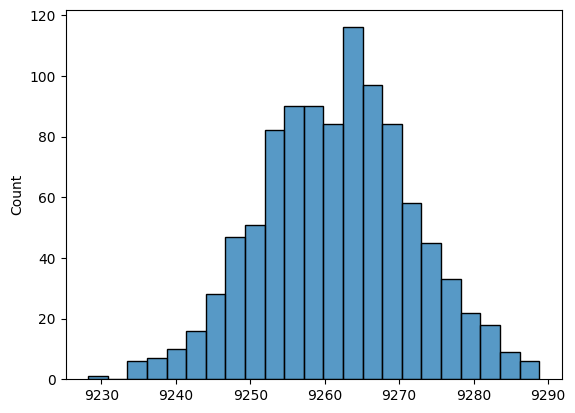

In [ ]:
sns.histplot(married_sample_means)

**90%**

In [ ]:
np.percentile(married_sample_means,[5.0,95.0])

array([9245.27669335, 9278.9511718 ])

**95%**

In [ ]:
np.percentile(married_sample_means,[2.5,97.5])

array([9241.69126519, 9281.67838382])

**99%**

In [ ]:
np.percentile(married_sample_means,[.5,99.5])

array([9235.10214412, 9286.30876354])

**Conclusion:**

There are equal participation from both married and unmarried customers, and thier confidence intervals are overlapping.

**Confidence interval for spendings of different age groups:**

In [ ]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
age_17_purchase = df.query('Age == "0-17"').Purchase
age_25_purchase = df.query('Age == "18-25"').Purchase
age_35_purchase = df.query('Age == "26-35"').Purchase
age_45_purchase = df.query('Age == "36-45"').Purchase
age_50_purchase = df.query('Age == "46-50"').Purchase
age_55_purchase = df.query('Age == "51-55"').Purchase
age_55plus_purchase = df.query('Age == "55+"').Purchase

**Confidence interval for 0-17 age group:**

In [ ]:
age_17_sample_means = []
for i in range(1000):
  sample = np.random.choice(age_17_purchase,size=len(age_17_purchase))
  samplemean = sample.mean()
  age_17_sample_means.append(samplemean)

In [ ]:
age_17_purchase.mean()

8933.464640444974

<Axes: ylabel='Count'>

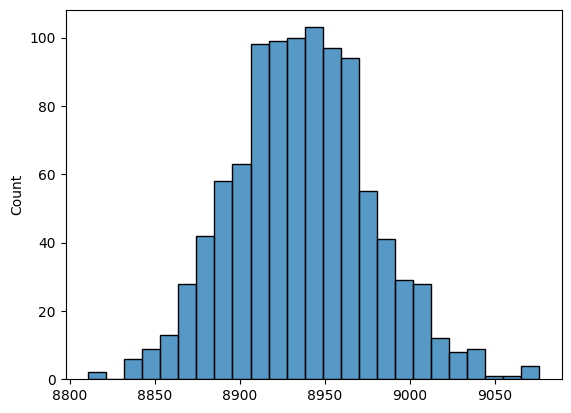

In [ ]:
sns.histplot(age_17_sample_means)

**90%**

In [ ]:
np.percentile(age_17_sample_means,[5,95])

array([8872.68080718, 9005.12011654])

**95%**

In [ ]:
np.percentile(age_17_sample_means,[2.5,97.5])

array([8858.32378824, 9021.3152397 ])

**99%**

In [ ]:
np.percentile(age_17_sample_means,[.5,99.5])

array([8841.93453615, 9047.15811647])

**Confidence interval for 18-25 age group:**

In [ ]:
age_25_sample_means = []
for i in range(1000):
  sample = np.random.choice(age_25_purchase,size=len(age_25_purchase))
  samplemean = sample.mean()
  age_25_sample_means.append(samplemean)

In [ ]:
age_25_purchase.mean()

9169.663606261289

<Axes: ylabel='Count'>

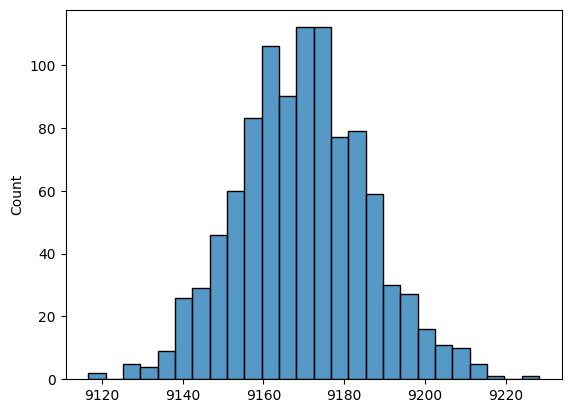

In [ ]:
sns.histplot(age_25_sample_means)

**90%**

In [ ]:
np.percentile(age_25_sample_means,[5,95])

array([9143.44908991, 9196.46355007])

**95%**

In [ ]:
np.percentile(age_25_sample_means,[2.5,97.5])

array([9139.33503387, 9203.33526942])

**99%**

In [ ]:
np.percentile(age_25_sample_means,[.5,99.5])

array([9128.34159633, 9212.08481387])

**Confidence interval for 26-35 age group:**

In [ ]:
age_35_sample_means = []
for i in range(1000):
  sample = np.random.choice(age_35_purchase,size=len(age_35_purchase))
  samplemean = sample.mean()
  age_35_sample_means.append(samplemean)

In [ ]:
age_35_purchase.mean()

9252.690632869888

<Axes: ylabel='Count'>

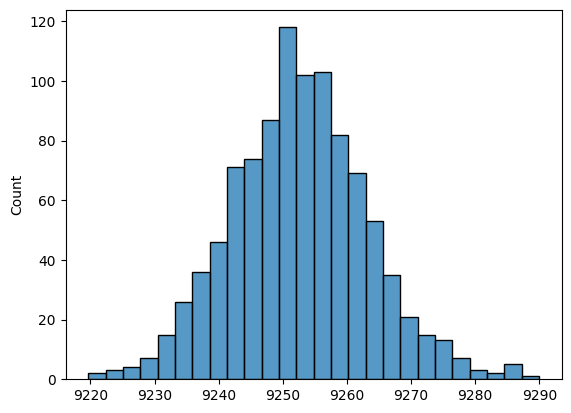

In [ ]:
sns.histplot(age_35_sample_means)

**90%**

In [ ]:
np.percentile(age_35_sample_means,[5,95])

array([9235.17215432, 9270.75395561])

**95%**

In [ ]:
np.percentile(age_35_sample_means,[2.5,97.5])

array([9231.89125415, 9274.39085385])

**99%**

In [ ]:
np.percentile(age_35_sample_means,[.5,99.5])

array([9225.11449114, 9285.38987151])

**Confidence interval for 36-45 age group:**

In [ ]:
age_45_sample_means = []
for i in range(1000):
  sample = np.random.choice(age_45_purchase,size=len(age_45_purchase))
  samplemean = sample.mean()
  age_45_sample_means.append(samplemean)

In [ ]:
age_45_purchase.mean()

9331.350694917874

<Axes: ylabel='Count'>

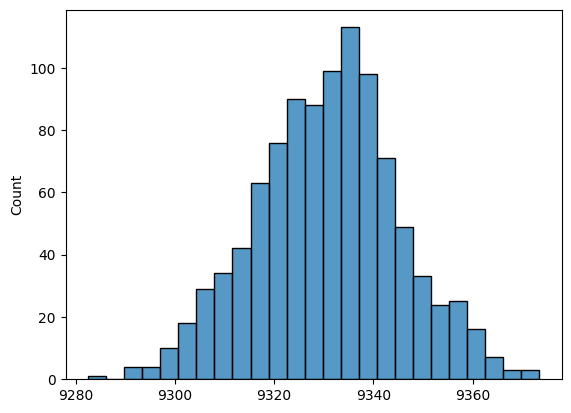

In [ ]:
sns.histplot(age_45_sample_means)

**90%**

In [ ]:
np.percentile(age_45_sample_means,[5,95])

array([9305.90927481, 9355.7073455 ])

**95%**

In [ ]:
np.percentile(age_45_sample_means,[2.5,97.5])

array([9302.61854849, 9359.15670966])

**99%**

In [ ]:
np.percentile(age_45_sample_means,[.5,99.5])

array([9293.56734336, 9366.22845468])

**Confidence interval for 46-50 age group:**

In [ ]:
age_50_sample_means = []
for i in range(1000):
  sample = np.random.choice(age_50_purchase,size=len(age_50_purchase))
  samplemean = sample.mean()
  age_50_sample_means.append(samplemean)

In [ ]:
age_50_purchase.mean()

9208.625697468327

<Axes: ylabel='Count'>

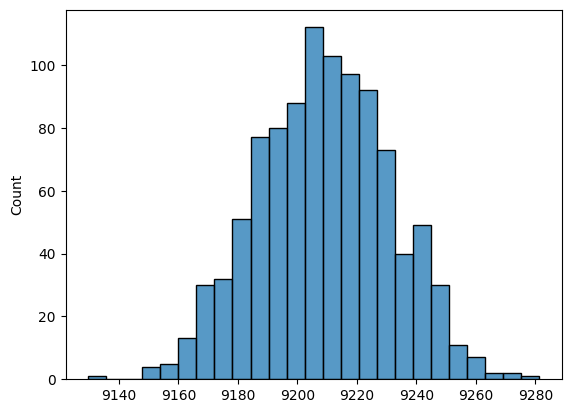

In [ ]:
sns.histplot(age_50_sample_means)

**90%**

In [ ]:
np.percentile(age_50_sample_means,[5,95])

array([9171.63745323, 9245.47258266])

**95%**

In [ ]:
np.percentile(age_50_sample_means,[2.5,97.5])

array([9166.54214514, 9249.43096705])

**99%**

In [ ]:
np.percentile(age_50_sample_means,[.5,99.5])

array([9155.59153673, 9262.83752412])

**Confidence interval for 51-55 age group:**

In [ ]:
age_55_sample_means = []
for i in range(1000):
  sample = np.random.choice(age_55_purchase,size=len(age_55_purchase))
  samplemean = sample.mean()
  age_55_sample_means.append(samplemean)

In [ ]:
age_55_purchase.mean()

9534.808030960236

<Axes: ylabel='Count'>

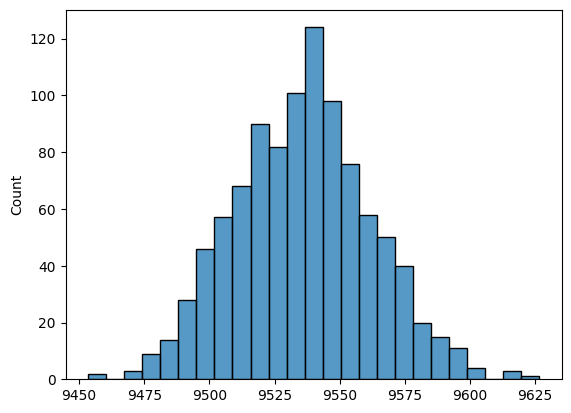

In [ ]:
sns.histplot(age_55_sample_means)

**90%**

In [ ]:
np.percentile(age_55_sample_means,[5,95])

array([9493.46963455, 9580.12314485])

**95%**

In [ ]:
np.percentile(age_55_sample_means,[2.5,97.5])

array([9486.83266344, 9588.2907918 ])

**99%**

In [ ]:
np.percentile(age_55_sample_means,[.5,99.5])

array([9475.73722942, 9600.86155282])

**Confidence interval for 50+ age group:**

In [ ]:
age_55plus_sample_means = []
for i in range(1000):
  sample = np.random.choice(age_55plus_purchase,size=len(age_55plus_purchase))
  samplemean = sample.mean()
  age_55plus_sample_means.append(samplemean)

In [ ]:
age_55plus_purchase.mean()

9336.280459449405

<Axes: ylabel='Count'>

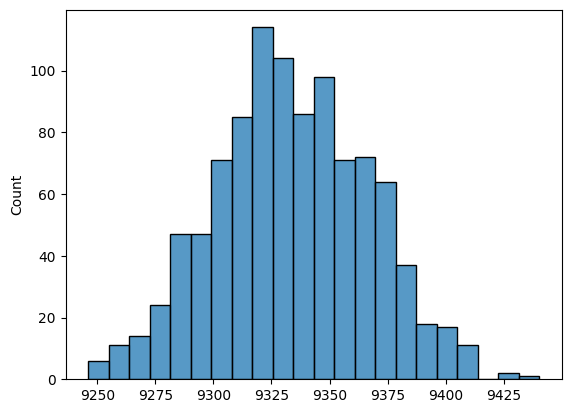

In [ ]:
sns.histplot(age_55plus_sample_means)

**90%**

In [ ]:
np.percentile(age_55plus_sample_means,[5,95])

array([9278.98078962, 9387.04146438])

**95%**

In [ ]:
np.percentile(age_55plus_sample_means,[2.5,97.5])

array([9269.79500442, 9397.96926735])

**99%**

In [ ]:
np.percentile(age_55plus_sample_means,[.5,99.5])

array([9253.55229143, 9411.59165992])

# Final Insights



*   Participation of female customers is really low compared to male customers
*   Confidence interval of married and unmarried customers is almost same
*   participation of customers from age group of 25-45 is larger but thier spending is almost equal to other age groups
*   most spending is done between price range of 5k to 10k



# Recommendations



*   Urgent action is needed to increase the participation of female customers
*   Formulate a strategy to increase the spending of the customers from age group of 25-45
*   Focus on the highest spending confidence intervals

